# Visualising Filter Bank

In [322]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [438]:
from filter_bank import circular_harmonic_2d, circular_harmonic_filter_bank
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
import numpy as np

In [473]:
# sigma_0 = 1
# j=2
# sigma = sigma_0 * 2 ** j
filters = circular_harmonic_filter_bank(128,128,4,7,2,fourier=False)

In [353]:
# print(filters)
print(len(filters))
print(filters[0].shape)

6
(5, 128, 128)


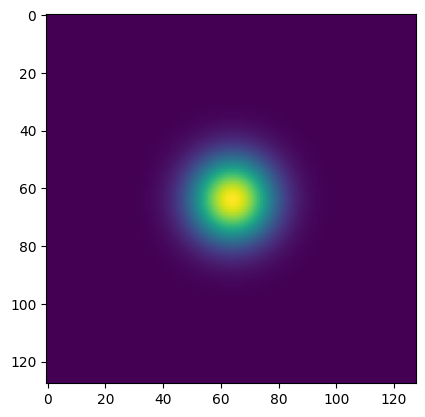

In [491]:
# filters = circular_harmonic_2d(64,64,2,0, fourier=True)
centered_filt = np.fft.fftshift(np.real(filters[0][4]))
plt.imshow(centered_filt)
# print(np.real(filters[0][0]))
# print(np.real(filters[3][0]))

In [ ]:
# fig = plt.figure(layout="constrained")
# gs = GridSpec(filters[0].shape[0], len(filters), figure=fig)
# for _, frequency in enumerate(filters):
#     for 

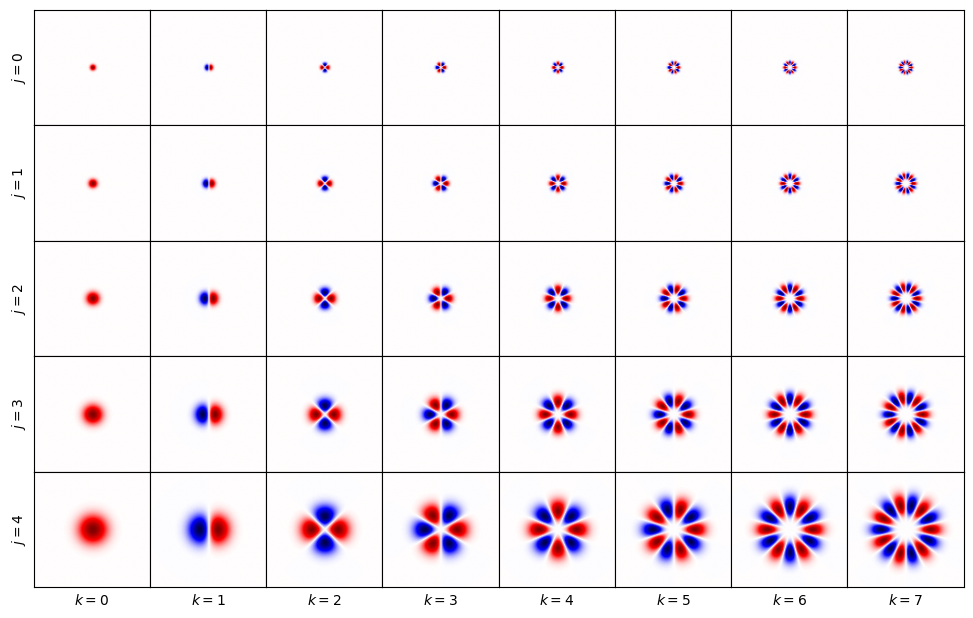

In [490]:
fig, axs = plt.subplots(filters[0].shape[0],len(filters), figsize=(1.5*8, 1.5*5))
# fig.axis('off')
fig.subplots_adjust(wspace=0, hspace=0)
# fig.supxlabel(r"frequency resolution")
# fig.supylabel(r'scale')

for l, filters_l in enumerate(filters):
    for j in range(filters_l.shape[0]):
        filters_lj = filters_l[j]
        filters_lj = np.real(filters_lj) 
        filters_lj = np.fft.fftshift((filters_lj))
        ax = axs[j,l]
        pos = ax.imshow(filters_lj, cmap="seismic", norm=colors.CenteredNorm())
        # ax.set_axis_off()
        ax.set_aspect('auto')
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        if j == filters_l.shape[0] - 1:
            ax.set_xlabel(fr"$k={l}$")
        if l == 0:
            ax.set_ylabel(fr"$j={j}$")
        # fig.colorbar(pos)
# fig.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.savefig("wavelet-filters.png")